In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [29]:
file_path = "car_sales.csv"
car_data = pd.read_csv(file_path)

In [30]:
car_data = car_data.dropna(subset=["Price"])
X = car_data.drop("Price", axis=1)
y = car_data["Price"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
categorical_features = ["Brand", "Body", "Engine Type", "Registration", "Model"]
numerical_features = ["Mileage", "EngineV", "Year"]

In [33]:
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(
    strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])



numerical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='mean'))])



preprocessor = ColumnTransformer(transformers=[(
    'num', numerical_transformer, numerical_features), ('cat', categorical_transformer, categorical_features)])



model = Pipeline(steps=[('preprocessor', preprocessor),
                 ('regressor', LinearRegression())])



model.fit(X_train, y_train)



y_pred = model.predict(X_test)



mse = mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

Mean Squared Error: 488235356.03
R-squared: 0.43


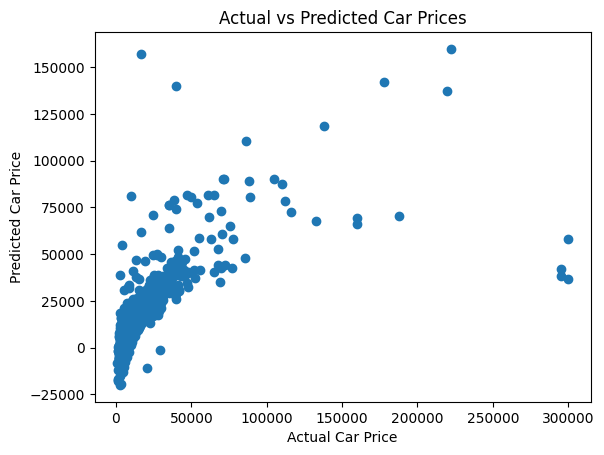

In [34]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()